# IMIT for Portfolio Management on DJ30
This tutorial is to demonstrate an example of using IMIT to do portfolio management on DJ30

However, it is highly suggested to run the code [here](https://github.com/qinmoelei/TradeMaster_reframe/blob/master/agent/Investor_Imitator/logic_discriptor/logic_discriptor.py) to train the logic descriptors and run the code [here](https://github.com/qinmoelei/TradeMaster_reframe/blob/master/agent/Investor_Imitator/RL/RL.py) to train the DPG using the python file instead of using this jupyter notebook.

It will take <font color="red">hours</font> to run the notebook.
## Set up Experinment Environment

In [ ]:
from IPython.display import clear_output
import argparse
import sys
import numpy as np
import torch
from torch import nn
import yaml
import os
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
requirements_path=module_path+"/requirements.txt"
print(requirements_path)
command="pip install -r "+requirements_path
os.system(command)
clear_output(wait=True)
! conda install pytorch torchvision torchaudio cudatoolkit=11.3 -c pytorch
clear_output(wait=True)

## Download and Preprocess the Data
The dataconfig part in TradeMaster is shared by all other parts, it is worth noticing that for algorithms trading, only the dataset BTC is supported.

The following code will help to download the data in the folder [.data/data/dj30](https://github.com/qinmoelei/TradeMaster_reframe/tree/master/tutorial/data/data/dj30), where 4 files could be found: the whole data and train, valid and test data which will be used when we try to construct the RL environment for the agent

In [ ]:
from data.download_data import Dataconfig
parser = argparse.ArgumentParser()

parser.add_argument("--data_path",
                    type=str,
                    default="./data/data/",
                    help="the path for storing the downloaded data")
#where we store the dataset
parser.add_argument(
    "--output_config_path",
    type=str,
    default="./config/output_config/data",
    help="the path for storing the generated config file for data")
# where we store the config file
parser.add_argument(
    "--dataset",
    choices=["exchange","dj30","sz50","crypto"],
    default="dj30",
    help="the name of the dataset",
)
parser.add_argument("--split_proportion",
                    type=list,
                    default=[0.8, 0.1, 0.1],
                    help="the split proportion for train, valid and test")
parser.add_argument(
    "--generate_config",
    type=bool,
    default=False,
    help=
    "determine whether to generate a yaml file to memorize the train valid and test'data's dict"
)
parser.add_argument(
    "--input_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the Dataconfig, this is needed when have other format of dataset"
)

parser.add_argument(
    "--input_config_path",
    type=str,
    default="config/input_config/data/custom.yml",
    help=
    "determine the location of a yaml file used to initialize the Dataconfig Class"
)
args = parser.parse_args(args=[])
a = Dataconfig(args)
clear_output(wait=True)
clear_output(wait=True)

The preprocessed data follows the following structure:


In [ ]:
data=pd.read_csv("data/data/dj30/dj30.csv",index_col=0)
data.head(5)

## IMIT Enviornment Construction, logic descriptor training and picking, Agent Training, Model Picking and Testing
### Logic Descriptor Training and Picking

In [1]:
from agent.Investor_Imitator.logic_discriptor.logic_discriptor import logic_discriptor
import argparse

parser = argparse.ArgumentParser()

parser.add_argument("--data_path",
                    type=str,
                    default="./data/data/",
                    help="the path for storing the downloaded data")

#where we store the dataset
parser.add_argument(
    "--output_config_path",
    type=str,
    default="config/output_config/data",
    help="the path for storing the generated config file for data")

# where we store the config file
parser.add_argument(
    "--dataset",
    choices=["dj30", "sz50", "acl18", "futures", "crypto", "exchange"],
    default="dj30",
    help="the name of the dataset",
)

parser.add_argument("--split_proportion",
                    type=list,
                    default=[0.8, 0.1, 0.1],
                    help="the split proportion for train, valid and test")

parser.add_argument(
    "--generate_config",
    type=bool,
    default=True,
    help=
    "determine whether to generate a yaml file to memorize the train valid and test'data's dict"
)

parser.add_argument(
    "--input_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the Dataconfig, this is needed when have other format of dataset"
)

parser.add_argument(
    "--input_config_path",
    type=str,
    default="config/input_config/data/custom.yml",
    help=
    "determine the location of a yaml file used to initialize the Dataconfig Class"
)

parser.add_argument(
    "--discriptor_path",
    type=str,
    default="./result/PM/invest_imitator/logic_discriptor",
    help="the path for storing the generated logic_discriptor file for data")

parser.add_argument("--seed",
                    type=int,
                    default=12345,
                    help="the random seed to train the logic discriptor")

parser.add_argument("--num_day",
                    type=int,
                    default=10,
                    help="the number of the day for us to make the label")

parser.add_argument(
    "--rank_name_list",
    type=list,
    default=["AR", "SR", "MDD", "ER", "WR"],
    help=
    "the list of the name of indicator we use to train the logic discriptor")

parser.add_argument(
    "--batch_size",
    type=int,
    default=256,
    help="the batch size of the data during the training process")

parser.add_argument("--hidden_size",
                    type=int,
                    default=256,
                    help="the size of the hidden nodes of MLP_reg ")

parser.add_argument(
    "--optimizer",
    choices=[
        "Adam", "SGD", "ASGD", "Rprop", "Adagrad", "Adadelta", "RMSprop",
        "Adamax", "SparseAdam", "LBFGS"
    ],
    default="Adam",
    help="the name of the optimizer",
)

parser.add_argument(
    "--num_epoch",
    type=int,
    default=10,
    help="the number of epoch",
)
parser.add_argument(
    "--input_logic_config",
    type=bool,
    default=False,
    help=
    "determine whether to use a yaml file as the overall input of the logic_discriptor, this is needed when have other format of dataset"
)
parser.add_argument(
    "--input_logic_config_dict",
    type=str,
    default="config/input_config/agent/investor_imitator/logic_discriptor.yml",
    help=
    "determine the path of a yaml file as the overall input of the logic_discriptor"
)
args = parser.parse_args(args=[])
a = logic_discriptor(args)

/home/sunshuo/miniconda3/envs/TradeMaster/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sunshuo/qml/TradeMaster/tutorial/data/preprocess.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  (temp_indicator.close.rolling(2).sum() - temp_indicator.close)) - 1
/home/sunshuo/qml/TradeMaster/tutorial/data/preprocess.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

KeyboardInterrupt: 

### Enviornment Construction and Reinforcement Learning

In [1]:
from agent.Investor_Imitator.RL.RL import Agent,env_creator,load_yaml
import argparse
parser = argparse.ArgumentParser()
parser.add_argument(
    "--env_name",
    choices=["portfolio"],
    default="portfolio",
    help="the name of TradingEnv ",
)
parser.add_argument(
    "--dict_trained_model",
    default="result/PM/invest_imitator/trained_model",
    help="the dict of the trained model ",
)

parser.add_argument(
    "--train_env_config_dict",
    default=
    "config/input_config/env/portfolio/portfolio_for_investor_imitator/train.yml",
    help="the dict of the train config of TradingEnv ",
)

parser.add_argument(
    "--valid_env_config_dict",
    default=
    "config/input_config/env/portfolio/portfolio_for_investor_imitator/valid.yml",
    help="the dict of the valid config of TradingEnv ",
)

parser.add_argument(
    "--test_env_config_dict",
    default=
    "config/input_config/env/portfolio/portfolio_for_investor_imitator/test.yml",
    help="the dict of the test config of TradingEnv ",
)

parser.add_argument(
    "--num_epochs",
    type=int,
    default=10,
    help="the number of training epoch",
)

parser.add_argument(
    "--random_seed",
    type=int,
    default=12345,
    help="the number of training epoch",
)

parser.add_argument(
    "--result_dict",
    type=str,
    default="result/PM/invest_imitator/test_result/",
    help="the dict of the result of the test",
)
parser.add_argument(
    "--input_config_RL",
    type=bool,
    default=False,
    help="whether to use yaml as the config",
)
parser.add_argument(
    "--input_config_dict_RL",
    type=str,
    default="config/input_config/agent/investor_imitator/RL.yml",
    help="the dict of yaml",
)
parser.add_argument(
    "--seed",
    type=int,
    default=12345,
    help="the random seed",
)

args = parser.parse_args(args=[])
agent = Agent(args)
agent.train_with_valid()
agent.test()


/home/sunshuo/miniconda3/envs/TradeMaster/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

For the simplicity, we use the yaml file to store the configuration for the RL environment construction, which can be found [here](https://github.com/qinmoelei/TradeMaster_reframe/tree/master/tutorial/config/input_config/env/PM/portfolio_for_IMIT)
but first, let us import the package we might use

Test Visualization

In [2]:
import pandas as pd
test_result=pd.read_csv("result/PM/invest_imitator/test_result/result.csv",index_col=0)
test_result.head(5)

,daily_return,total assets
0,0.000000,100000.000000
1,0.002944,100294.362806
2,0.018698,102169.639479
3,0.014027,103602.724627
4,-0.000181,103583.978346


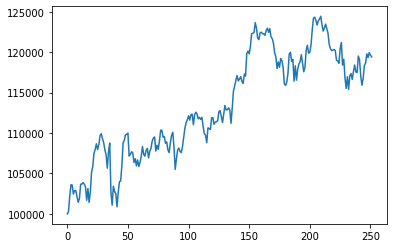

In [3]:
from matplotlib import pyplot as plt
x = range(len(test_result))
y = test_result["total assets"].tolist()
plt.plot(x, y)  
plt.show()